<center><h1>Training Binary Classifiers</h1>
John Ignacio R.M. Jun 2020</center>

In [1]:
#ada library
ada_parent_dir = "../"
import sys
sys.path.append(ada_parent_dir)
from ada import read_dataset, split_dataset, BinClassifModelV1 as BC1

Welcome to JupyROOT 6.20/04
Using TensorFlow backend.


In [2]:
source_path = "../../processed_data/xtohh"
signal = "Xtohh2000"
bg = "Xtohh_background"
seed = 420

## Tag 0

In [3]:
#read xtohh dataset
df = read_dataset(source_path, signal, bg, "SR", 0)
df.head()

,EventWeight,label,m_FJpt,m_FJeta,m_FJphi,m_FJm,m_DTpt,m_DTeta,m_DTphi,m_DTm,m_dPhiFTwDT,m_dRFJwDT,m_dPhiDTwMET,m_MET,m_hhm,m_bbttpt
0,0.000964,1,896.62850,-0.392216,2.501445,106789.510,814.04913,0.364838,-0.600093,109284.550,3.101539,3.192596,0.601989,76.84809,1844.9940,89.38791
1,0.001396,1,851.81160,-0.002096,-0.306656,59536.176,682.90424,0.453039,2.785108,83804.805,3.091765,3.125085,-0.013570,248.04950,1571.4967,173.12900
2,0.001353,1,951.72064,-1.143841,1.505861,140620.270,537.69430,0.126152,-1.388002,85971.390,2.893863,3.160273,-0.248516,159.33801,1736.1398,450.18076
3,0.001459,1,1297.60180,-0.026495,-1.593579,131354.060,428.23917,0.990372,2.255949,84504.710,2.433657,2.637557,-0.209463,208.46284,1621.3430,1011.35870
4,0.001573,1,560.56790,-0.197311,1.968327,115360.140,664.99460,1.585189,-1.479192,103504.414,2.835667,3.349375,-0.157293,138.26671,1748.2450,213.35873


In [4]:
sets = split_dataset(df, 0.6, 0.2, 0.2, seed)
sets["x"]["train"].head()

,m_FJpt,m_FJeta,m_FJphi,m_FJm,m_DTpt,m_DTeta,m_DTphi,m_DTm,m_dPhiFTwDT,m_dRFJwDT,m_dPhiDTwMET,m_MET,m_hhm,m_bbttpt
0,-0.569323,-1.454983,-1.680213,-0.629633,-0.863566,1.208414,-0.115954,-0.951367,-0.719438,1.521720,0.669183,-0.790888,0.732940,0.029177
1,-0.934155,-0.142118,1.281529,-0.985823,-1.021279,0.363099,-0.400330,-1.198220,0.504604,-0.207523,-0.014649,0.218434,-1.212826,-0.509524
2,-0.183606,0.807043,-1.080527,-0.671667,-1.042722,0.499869,0.757419,0.619056,0.074651,-0.555479,-2.848074,-0.875062,-0.943551,0.345479
3,-0.824475,0.806050,0.322800,-0.086871,-0.312266,-0.429767,-1.354678,0.921306,0.405786,0.228829,0.895472,-0.853377,-0.524161,-0.898115
4,0.021651,1.136830,1.288394,-0.679141,-0.124237,1.416869,-0.443243,-0.397500,0.601755,-0.213779,-0.355160,0.422335,-0.509168,-0.178913


In [5]:
bc1_tag0 = BC1(sets["x"]["train"].shape[1])
bc1_tag0.fit(
    sets["x"]["train"], sets["y"]["train"], sets["w"]["train"],
    sets["x"]["val"], sets["y"]["val"], sets["w"]["val"],
    50
)

Train on 33777 samples, validate on 11259 samples
Epoch 1/50
33777/33777 [==============================] - 7s 210us/step - loss: 6.4817e-04 - val_loss: 4.3737e-04
Epoch 2/50
33777/33777 [==============================] - 6s 172us/step - loss: 4.4261e-04 - val_loss: 4.1127e-04
Epoch 3/50
33777/33777 [==============================] - 6s 168us/step - loss: 4.3884e-04 - val_loss: 4.1996e-04
Epoch 4/50
33777/33777 [==============================] - 6s 175us/step - loss: 4.2904e-04 - val_loss: 4.1233e-04
Epoch 5/50
33777/33777 [==============================] - 6s 174us/step - loss: 4.2511e-04 - val_loss: 4.0544e-04
Epoch 6/50
33777/33777 [==============================] - 6s 179us/step - loss: 4.2853e-04 - val_loss: 4.0641e-04
Epoch 7/50
33777/33777 [==============================] - 6s 171us/step - loss: 4.2537e-04 - val_loss: 4.0143e-04
Epoch 8/50
33777/33777 [==============================] - 6s 177us/step - loss: 4.1624e-04 - val_loss: 4.1206e-04
Epoch 9/50
33777/33777 [==============

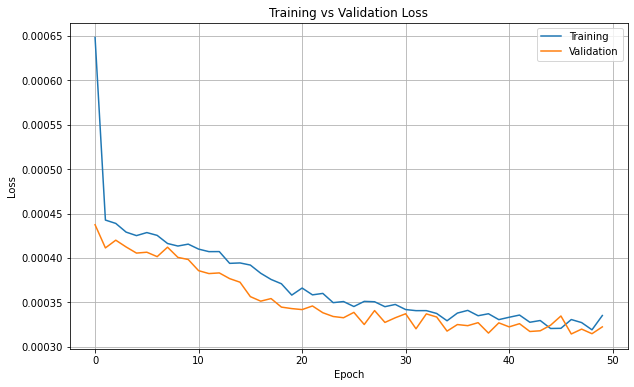

In [18]:
bc1_tag0.plot_loss()

In [12]:
bc1_tag0.evaluate(sets["x"]["test"], sets["y"]["test"])

In [20]:
#bc1_tag0.save("../../saved_models", "tag0_jun_2020")

## Tag 1

In [8]:
#read xtohh dataset
df = read_dataset(source_path, signal, bg, "SR", 1)
df.head()

,EventWeight,label,m_FJpt,m_FJeta,m_FJphi,m_FJm,m_DTpt,m_DTeta,m_DTphi,m_DTm,m_dPhiFTwDT,m_dRFJwDT,m_dPhiDTwMET,m_MET,m_hhm,m_bbttpt
0,0.000924,1,712.04987,0.777979,-1.545740,110815.440,352.04910,-1.051462,1.510991,66249.040,3.056731,3.562367,0.100524,191.302860,1460.4628,362.497900
1,0.001201,1,811.50574,0.572188,-2.850629,104430.520,749.68250,-0.517416,0.349243,115776.445,3.083314,3.270177,-0.372708,52.183260,1810.2671,76.732270
2,0.000936,1,515.09570,-1.187085,-0.599296,103066.414,434.88837,0.988049,2.589869,72923.710,3.094020,3.782085,-0.031341,155.676510,1573.5206,83.307240
3,0.000982,1,825.25050,0.555025,-2.598408,77778.470,773.21750,-0.349498,0.542499,109134.120,3.140907,3.268556,0.047143,41.337784,1774.2710,52.035880
4,0.001257,1,516.90210,1.204237,-1.797073,183877.950,548.83075,-1.522980,1.389005,94300.130,3.097108,4.126717,0.669538,60.221653,2240.3710,39.758583


In [9]:
sets = split_dataset(df, 0.6, 0.2, 0.2, seed)
sets["x"]["train"].head()

,m_FJpt,m_FJeta,m_FJphi,m_FJm,m_DTpt,m_DTeta,m_DTphi,m_DTm,m_dPhiFTwDT,m_dRFJwDT,m_dPhiDTwMET,m_MET,m_hhm,m_bbttpt
0,0.867840,0.356640,1.167905,-0.061652,0.507345,1.003025,-0.588037,0.141753,0.404200,-0.315846,-0.455940,0.289710,0.316159,0.270937
1,0.302375,-0.639431,1.639374,-0.089650,-1.080488,-0.101024,-0.264255,-0.976572,-1.014440,-1.255061,0.639547,1.626460,-1.087231,1.177989
2,0.506220,1.261525,-0.432246,-0.958477,1.455772,-0.613891,1.287555,-0.126837,0.476696,0.844689,-2.000573,-1.157203,2.008548,-0.887692
3,-1.727064,-2.018008,-0.572949,0.794526,-1.220742,0.603366,1.310630,-0.860938,-0.526392,1.549001,0.755960,-1.235323,-0.512929,-0.826652
4,-0.495464,1.349038,-1.528917,1.007694,-0.134578,-0.209359,-0.028194,0.001925,-1.935452,-0.977784,-0.757976,-0.977451,-0.171603,0.240656


In [8]:
bc1_tag1 = BC1(sets["x"]["train"].shape[1])
bc1_tag1.fit(
    sets["x"]["train"], sets["y"]["train"], sets["w"]["train"],
    sets["x"]["val"], sets["y"]["val"], sets["w"]["val"],
    50
)

Train on 9651 samples, validate on 3218 samples
Epoch 1/50
9651/9651 [==============================] - 2s 193us/step - loss: 0.0071 - val_loss: 0.0018
Epoch 2/50
9651/9651 [==============================] - 1s 142us/step - loss: 0.0019 - val_loss: 0.0018
Epoch 3/50
9651/9651 [==============================] - 1s 146us/step - loss: 0.0019 - val_loss: 0.0018
Epoch 4/50
9651/9651 [==============================] - 1s 146us/step - loss: 0.0019 - val_loss: 0.0018
Epoch 5/50
9651/9651 [==============================] - 2s 168us/step - loss: 0.0019 - val_loss: 0.0018
Epoch 6/50
9651/9651 [==============================] - 2s 216us/step - loss: 0.0019 - val_loss: 0.0017
Epoch 7/50
9651/9651 [==============================] - 2s 239us/step - loss: 0.0017 - val_loss: 0.0014
Epoch 8/50
9651/9651 [==============================] - 2s 189us/step - loss: 0.0016 - val_loss: 0.0013
Epoch 9/50
9651/9651 [==============================] - 2s 193us/step - loss: 0.0015 - val_loss: 0.0011
Epoch 10/50
9651

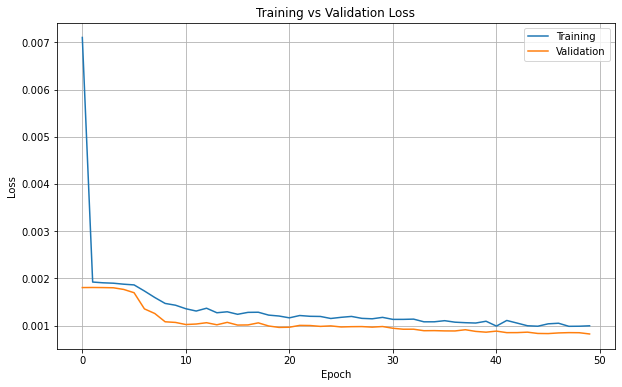

In [9]:
bc1_tag1.plot_loss()

In [10]:
bc1_tag1.evaluate(sets["x"]["test"], sets["y"]["test"])

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       824
           1       0.93      0.91      0.92      2394

    accuracy                           0.88      3218
   macro avg       0.84      0.85      0.84      3218
weighted avg       0.88      0.88      0.88      3218

Confussion Matrix
[[ 651  173]
 [ 222 2172]]


In [11]:
#bc1_tag1.save("../../saved_models", "tag1_jun_2020")

modelo
modelo
historia
mas historia


## Tag 2

In [12]:
#read xtohh dataset
df = read_dataset(source_path, signal, bg, "SR", 2)
df.head()

,EventWeight,label,m_FJpt,m_FJeta,m_FJphi,m_FJm,m_DTpt,m_DTeta,m_DTphi,m_DTm,m_dPhiFTwDT,m_dRFJwDT,m_dPhiDTwMET,m_MET,m_hhm,m_bbttpt
0,0.001020,1,885.55927,0.104927,-2.448576,127604.30,623.22710,-0.731510,0.656939,85368.720,3.105514,3.216185,-0.192894,237.88724,1631.6702,263.697630
1,0.001117,1,855.69904,0.313113,-1.859287,122862.90,449.37933,-0.306591,0.920655,55754.656,2.779941,2.848176,-0.019178,485.03333,1293.4028,463.512360
2,0.000925,1,552.47845,-0.702952,-2.549875,109091.67,631.70496,1.020756,0.610602,76213.550,3.122708,3.566858,-0.742126,104.55922,1659.8483,80.008150
3,0.001158,1,525.10590,-0.941433,-1.130162,82382.28,416.48105,0.103909,1.981465,58332.793,3.111627,3.282524,-0.130256,166.60722,1075.3092,109.524925
4,0.001120,1,916.44147,-0.683193,1.804695,115936.01,677.16440,-0.495132,-1.274429,94135.960,3.079124,3.084862,0.416606,167.35030,1595.7611,244.283460


In [13]:
sets = split_dataset(df, 0.6, 0.2, 0.2, seed)
sets["x"]["train"].head()

,m_FJpt,m_FJeta,m_FJphi,m_FJm,m_DTpt,m_DTeta,m_DTphi,m_DTm,m_dPhiFTwDT,m_dRFJwDT,m_dPhiDTwMET,m_MET,m_hhm,m_bbttpt
0,0.130367,0.444366,-0.742402,-1.667881,-0.481700,-0.821738,0.986630,-0.707962,0.286199,-0.060604,-0.308809,1.122165,-0.536045,0.343074
1,-0.154324,-0.757036,-1.493544,-0.589215,0.568245,-0.957618,0.263328,-0.190632,0.639077,-0.390635,-0.565153,-0.441870,-0.438832,-0.838744
2,0.909062,-0.559545,-1.666243,1.438288,0.033011,0.764030,0.097340,-0.283146,0.723747,0.299002,0.002110,0.820174,0.623691,0.595543
3,0.198608,-0.114302,1.325361,0.481073,0.195452,-1.168931,-0.468388,-0.280492,-0.281793,-0.609963,0.190788,1.189810,-0.078685,-0.048231
4,0.395712,-0.212834,-1.236288,-0.036609,-0.663686,0.235153,0.669041,-0.908677,-0.627592,-1.114341,0.051936,1.887263,-1.088247,0.856897


In [14]:
bc1_tag2 = BC1(sets["x"]["train"].shape[1])
bc1_tag2.fit(
    sets["x"]["train"], sets["y"]["train"], sets["w"]["train"],
    sets["x"]["val"], sets["y"]["val"], sets["w"]["val"],
    50
)

Train on 5283 samples, validate on 1761 samples
Epoch 1/50
5283/5283 [==============================] - 1s 230us/step - loss: 0.0045 - val_loss: 4.5207e-04
Epoch 2/50
5283/5283 [==============================] - 1s 145us/step - loss: 8.3645e-04 - val_loss: 4.2146e-04
Epoch 3/50
5283/5283 [==============================] - 1s 149us/step - loss: 8.0517e-04 - val_loss: 4.3847e-04
Epoch 4/50
5283/5283 [==============================] - 1s 157us/step - loss: 7.8430e-04 - val_loss: 4.5045e-04
Epoch 5/50
5283/5283 [==============================] - 1s 195us/step - loss: 7.8415e-04 - val_loss: 3.6851e-04
Epoch 6/50
5283/5283 [==============================] - 1s 251us/step - loss: 7.9394e-04 - val_loss: 4.5094e-04
Epoch 7/50
5283/5283 [==============================] - 1s 250us/step - loss: 7.8145e-04 - val_loss: 4.9841e-04
Epoch 8/50
5283/5283 [==============================] - 1s 195us/step - loss: 7.8081e-04 - val_loss: 4.3425e-04
Epoch 9/50
5283/5283 [==============================] - 1s 1

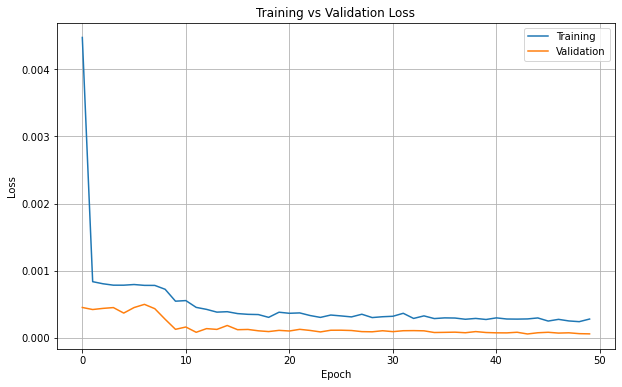

In [15]:
bc1_tag2.plot_loss()

In [16]:
bc1_tag2.evaluate(sets["x"]["test"], sets["y"]["test"])

Classification Report
              precision    recall  f1-score   support

           0       0.49      0.61      0.54        46
           1       0.99      0.98      0.99      1716

    accuracy                           0.97      1762
   macro avg       0.74      0.80      0.76      1762
weighted avg       0.98      0.97      0.97      1762

Confussion Matrix
[[  28   18]
 [  29 1687]]


In [17]:
#bc1_tag2.save("../../saved_models", "tag2_jun_2020")

modelo
modelo
historia
mas historia


In [21]:
#read
#with open("eval_BCM1_vtag0-Jun-2020", 'r') as json_file:
#    loaded_eval = json.loads(json_file.read())
#    json_file.close()

#loaded_eval["class_report"]